<a href="https://colab.research.google.com/github/alexanderjireland/ff-draft-optimizer/blob/main/ff_projections_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from ff_projections import *
import pandas as pd
import numpy as np

In [23]:
%load_ext autoreload
%autoreload 2

In [2]:
pm_train, pm_test  = read_in_data_for_projections('/content/projection_models_data_06_02.csv')

In [3]:
X_train, y_train, X_test, y_test = create_X_y_train_test(pm_train, pm_test)

In [4]:
X_train, X_test = add_is_draftable_column(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.80
Precision: 0.82
Recall: 0.85
[[274  95]
 [ 78 426]]


In [5]:
trace = run_pm_model(X_train, y_train)

Mean of coefficients: [ 1.07983072e+00  1.47647820e+00 -5.51825099e-01 -1.03588792e-01
 -8.19480955e-01 -2.25552696e-01  3.93817247e-01  3.98538614e-01
 -1.41487482e-01  2.51177569e-01  1.44456649e+00 -8.01971030e-01
 -9.85605432e-01  3.56598479e-01  3.01850868e-01  4.85750843e-01
 -3.09765119e-01  2.69531440e-01 -3.83735439e-01 -4.72657216e-01
 -2.60516357e-01 -3.35370134e-01 -3.80627162e-01 -6.16672015e-01
  1.09814743e-01 -1.93342725e-01 -7.15487957e-01 -4.91353427e-01
  8.94319704e-02  1.35742048e+00 -2.66299652e-01 -7.89286080e-01
 -3.24261233e-01  2.00185529e-01  7.84974774e-01 -8.19384309e-01
 -1.27721633e+00  1.48567618e-01 -3.31100684e-01  2.38019624e-01
 -8.26462391e-01  8.43177337e-01  2.61957434e-02 -2.36511216e-01
  3.46710070e-01 -1.29650112e-01  1.66476471e-01 -3.81121361e-01
 -1.64056722e-01 -5.27744123e-01  5.76462015e-02 -1.66239385e-01
 -3.29807148e-01 -8.07331781e-03 -1.65770351e-02  1.28650180e-01
  3.37716973e-01  6.65861385e-01 -9.26621586e-01  1.56729644e-01
 -9

Output()

In [6]:
import os
from google.colab import drive
drive.mount('/content/drive')
directory = "/content/drive/MyDrive/PyMC_Models"
os.makedirs(directory, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
save_trace_filepath = "/content/drive/MyDrive/PyMC_Models/model_06_03.nc"
az.to_netcdf(trace, save_trace_filepath)

'/content/drive/MyDrive/PyMC_Models/model_06_03.nc'

array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

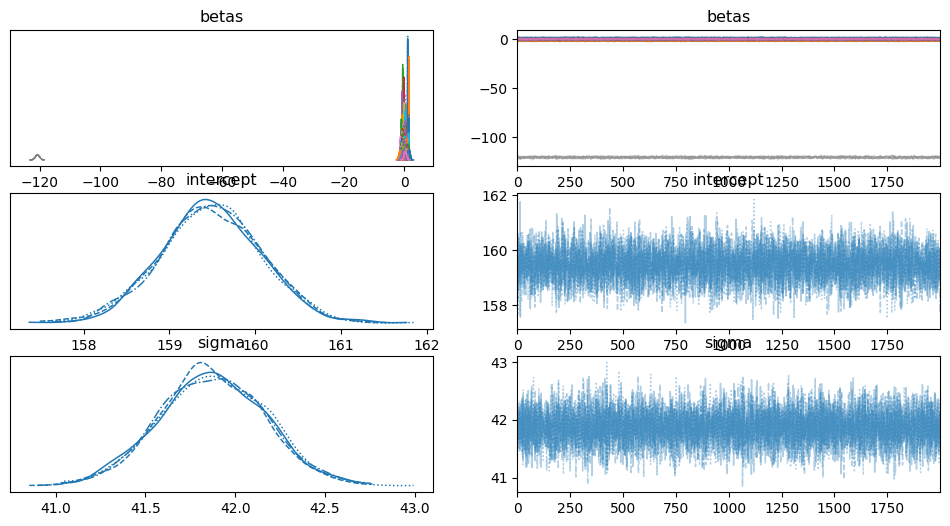

In [8]:
az.plot_trace(trace)

In [10]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[PC1],1.080,0.030,1.027,1.137,0.000,0.000,14011.0,5614.0,1.0
betas[PC2],1.476,0.035,1.408,1.541,0.000,0.000,12761.0,5735.0,1.0
betas[PC3],-0.551,0.041,-0.629,-0.474,0.000,0.001,14992.0,5516.0,1.0
betas[PC4],-0.103,0.045,-0.190,-0.021,0.000,0.001,12979.0,5825.0,1.0
betas[PC5],-0.819,0.054,-0.920,-0.719,0.000,0.001,15897.0,6243.0,1.0
...,...,...,...,...,...,...,...,...,...
betas[PC126],0.265,0.394,-0.483,0.976,0.003,0.005,16412.0,5637.0,1.0
betas[PC127],0.310,0.396,-0.420,1.056,0.003,0.005,14741.0,6163.0,1.0
betas[is_draftable],-120.712,0.715,-122.059,-119.335,0.008,0.007,7594.0,6418.0,1.0
intercept[0],159.480,0.585,158.400,160.591,0.007,0.006,7867.0,5820.0,1.0


PC1             68.012084
PC2             -0.019538
PC3            -11.473354
PC4             13.070029
PC5             28.089067
                  ...    
PC124           -4.553537
PC125            1.381015
PC126           -2.239772
PC127           -2.095985
is_draftable     0.000000
Name: 0, Length: 128, dtype: float64
fantasy_pts    0.0
Name: 3865, dtype: float64
Projected season points (median): 215.5
95% credible interval: [129.2, 297.2]
90% credible interval: [144.2, 285.3]
85% credible interval: [152.8, 276.1]
75% credible interval: [165.2, 264.0]
50% credible interval: [185.9, 244.5]
Probability points > 200: 64.03%


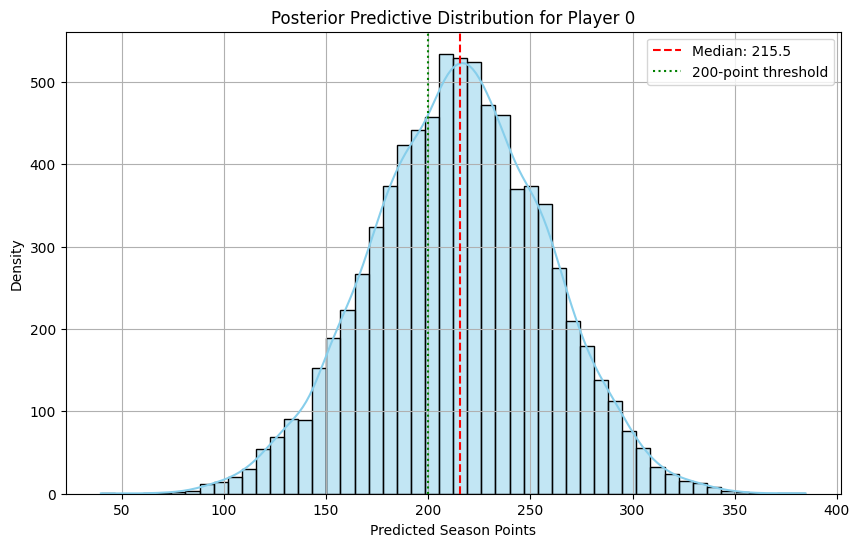

In [9]:
predict_player(0, trace, X_test, y_test)

PC1             42.406856
PC2             14.959529
PC3             -4.045227
PC4              9.648118
PC5             20.094513
                  ...    
PC124           -1.611975
PC125            2.265978
PC126           -0.021827
PC127            1.498882
is_draftable     0.000000
Name: 350, Length: 128, dtype: float64
fantasy_pts    257.36
Name: 9907, dtype: float64
Projected season points (median): 242.5
95% credible interval: [158.1, 323.0]
90% credible interval: [172.6, 310.1]
85% credible interval: [180.0, 301.9]
75% credible interval: [193.2, 290.2]
50% credible interval: [213.7, 271.2]
Probability points > 200: 84.10%


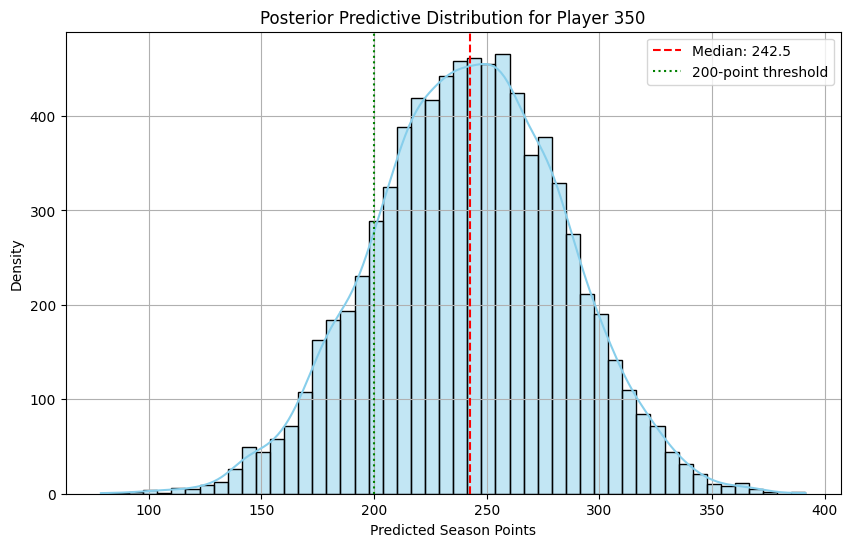

In [11]:
predict_player(350, trace, X_test, y_test)

PC1              0.104425
PC2             18.301917
PC3            -22.664682
PC4             -1.576018
PC5             13.184499
                  ...    
PC124            2.097275
PC125           -0.901057
PC126            2.004975
PC127           -2.139627
is_draftable     0.000000
Name: 399, Length: 128, dtype: float64
fantasy_pts    152.6
Name: 10076, dtype: float64
Projected season points (median): 215.3
95% credible interval: [130.9, 298.8]
90% credible interval: [145.0, 285.2]
85% credible interval: [153.5, 276.4]
75% credible interval: [165.8, 264.6]
50% credible interval: [186.2, 244.0]
Probability points > 200: 63.69%


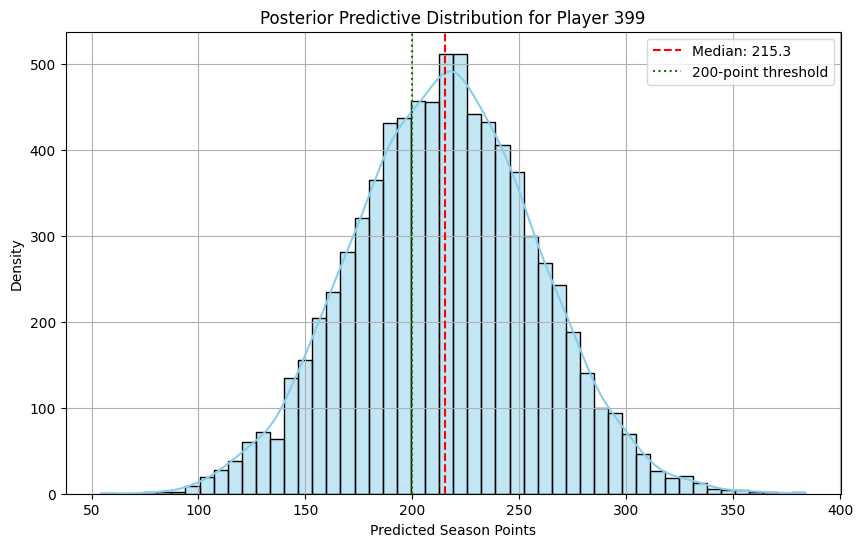

In [13]:
predict_player(399, trace, X_test, y_test)

In [86]:
pm_test = pm_test.reset_index(drop=True)

In [100]:
pm_test.sample(20)

,season,gsis_id,full_name_all_players,fantasy_pts,ff_pts_prev_year,years_exp,Rank,ESPN,AVG,position_rank,...,significant_injury_prev_season,cum_player_mean_prev_season,cum_player_std_prev_season,cum_player_min_prev_season,cum_player_noninjured_min_prev_season,cum_player_max_prev_season,position_QB,position_RB,position_TE,position_WR
508,2023,00-0034753,Mark Andrews,135.40,190.50,5.0,29.0,36.0,30.3,2.0,...,1.0,191.920000,64.184632,107.20,NaN,284.60,False,False,True,False
671,2024,00-0038951,Sean Tucker,67.10,5.20,1.0,620.0,NaN,469.0,150.0,...,0.0,5.200000,NaN,5.20,5.20,5.20,False,True,False,False
619,2023,00-0038122,Desmond Ridder,161.50,22.86,1.0,262.0,NaN,250.0,32.0,...,0.0,22.860000,NaN,22.86,22.86,22.86,True,False,False,False
655,2024,00-0039021,Roschon Johnson,70.50,100.10,1.0,253.0,NaN,244.3,67.0,...,0.0,100.100000,NaN,100.10,100.10,100.10,False,True,False,False
376,2024,00-0036331,Devin Duvernay,19.20,7.30,4.0,667.0,NaN,505.0,215.0,...,0.0,60.375000,43.749848,7.30,7.30,110.10,False,False,False,True
116,2023,00-0033923,Kareem Hunt,117.00,121.00,6.0,204.0,234.0,212.5,56.0,...,0.0,179.350000,79.822046,101.40,101.40,295.20,False,True,False,False
569,2024,00-0037327,Skylar Thompson,7.88,11.08,2.0,442.0,303.0,505.5,58.0,...,0.0,11.080000,NaN,11.08,11.08,11.08,True,False,False,False
412,2024,00-0035993,Tyler Huntley,51.98,11.78,4.0,746.0,NaN,633.0,110.0,...,0.0,35.100000,33.991218,2.80,2.80,75.80,True,False,False,False
401,2024,00-0036345,K.J. Osborn,18.70,117.10,4.0,338.0,NaN,315.5,111.0,...,0.0,101.350000,68.892888,0.00,0.00,149.40,False,False,False,True
350,2024,00-0036355,Justin Herbert,257.36,234.16,4.0,127.0,127.0,130.8,17.0,...,1.0,295.695000,56.554246,234.16,NaN,353.34,True,False,False,False
